Number of unique classes: 20
Number of training samples: 11314
Number of test samples: 7532
Accuracy: 0.7738980350504514
Precision: 0.8218781741893993
Recall: 0.7738980350504514


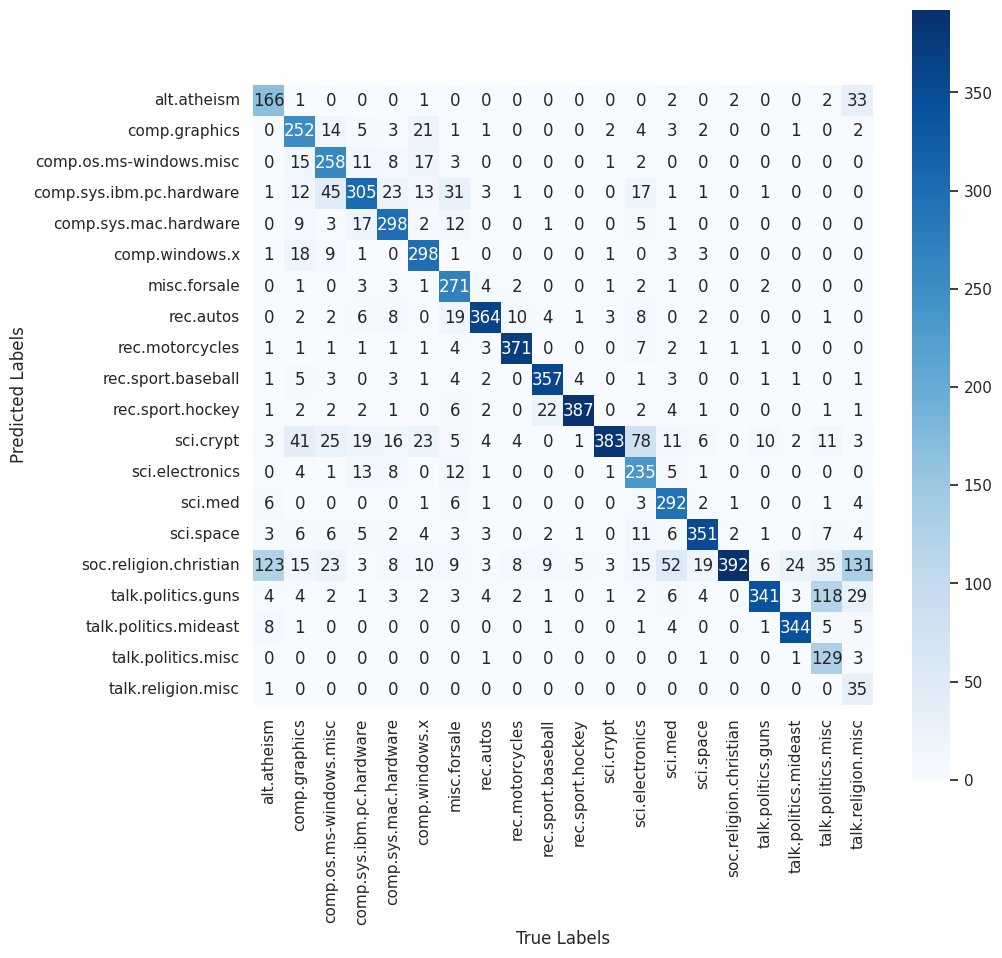

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
#Set seaborn plotting style
sns.set()
#Load the dataset
data=fetch_20newsgroups()
#Get the text categories
text_categories= data.target_names
#Define the training and test sets
train_data=fetch_20newsgroups (subset="train", categories=text_categories)
test_data = fetch_20newsgroups (subset="test", categories=text_categories)
print("Number of unique classes:", len(text_categories))
print("Number of training samples:", len(train_data.data))
print("Number of test samples:", len(test_data.data))
# Model building
model=make_pipeline (TfidfVectorizer(), MultinomialNB())
model.fit(train_data.data, train_data.target)
predicted_categories=model.predict(test_data.data)
# Compute metrics: accuracy, precision, and recall
accuracy= accuracy_score(test_data.target, predicted_categories)
precision = precision_score(test_data.target, predicted_categories, average='weighted')
recall =recall_score(test_data.target, predicted_categories, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
# Plotting the confusion matrix
mat=confusion_matrix(test_data.target, predicted_categories)
plt.figure(figsize=(10, 10))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cmap='Blues',xticklabels= train_data.target_names, yticklabels =train_data.target_names)
plt.xlabel('True Labels')
plt.ylabel('Predicted Labels')
plt.show()